# MAIN


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import platform
import warnings
import pickle
import re


In [ ]:
df = pd.read_csv('/content/real_df.csv')

In [ ]:
df.head()

,Unnamed: 0,publishedAt,title,video_id,view_count,like_count,comment_count,channel,playlist_title,date,year,hour,Duration,seconds
0,0,2020-10-02 17:58:34+00:00,유튜브 구독자 총합 400만명 합방 - 20년 8월 핫클립,-DxQoygYvCM,645910,10676,967,우왁굳의게임방송,"핫클립,하이라이트",2020-10-02,2020,17,PT10M11S,611
1,1,2020-10-03 13:50:10+00:00,초딩보다 더 순수한 40대들? - 40대들로 어몽어스를 해봤다! 틀몽어스 2화,-RLpSquZVn0,674278,12245,1256,우왁굳의게임방송,"합방,시리즈,기타 컨텐츠",2020-10-03,2020,13,PT18M27S,1107
2,2,2020-12-08 16:31:39+00:00,머리카락 자르려다 손님 머리 터트렸습니다,-QcILzXFrOE,831877,16272,1837,우왁굳의게임방송,먹방/캠방,2020-12-08,2020,16,PT14M17S,857
3,3,2022-11-05 19:46:32+00:00,만화책을 보고 계신게 아니라 마인크래프트 입니다. - 눕프로해커 원펀맨 가로우,-EZvzGoHMN8,1001431,15159,702,우왁굳의게임방송,마크,2022-11-05,2022,19,PT11M37S,697
4,4,2021-04-23 16:07:59+00:00,외국인들에게 납치당했습니다,-AfRi16kCIs,412647,8330,703,우왁굳의게임방송,똥겜,2021-04-23,2021,16,PT11M18S,678



* 5분_20분짜리 게임 영상 하나에 20~30만 원
* 쇼츠의 경우 만원~2만원 , 2만원으로 통일하자
* 상황극의 경우 거의 풀영상으로 나오는 경우가 많으므로 / 1.5 해줬다

In [ ]:
df

,Unnamed: 0,publishedAt,title,video_id,view_count,like_count,comment_count,channel,playlist_title,date,year,hour,Duration,seconds,cost
0,0,2020-10-02 17:58:34+00:00,유튜브 구독자 총합 400만명 합방 - 20년 8월 핫클립,-DxQoygYvCM,645910,10676,967,우왁굳의게임방송,"핫클립,하이라이트",2020-10-02,2020,17,PT10M11S,611,101833.33
1,1,2020-10-03 13:50:10+00:00,초딩보다 더 순수한 40대들? - 40대들로 어몽어스를 해봤다! 틀몽어스 2화,-RLpSquZVn0,674278,12245,1256,우왁굳의게임방송,"합방,시리즈,기타 컨텐츠",2020-10-03,2020,13,PT18M27S,1107,184500.00
2,2,2020-12-08 16:31:39+00:00,머리카락 자르려다 손님 머리 터트렸습니다,-QcILzXFrOE,831877,16272,1837,우왁굳의게임방송,먹방/캠방,2020-12-08,2020,16,PT14M17S,857,142833.33
3,3,2022-11-05 19:46:32+00:00,만화책을 보고 계신게 아니라 마인크래프트 입니다. - 눕프로해커 원펀맨 가로우,-EZvzGoHMN8,1001431,15159,702,우왁굳의게임방송,마크,2022-11-05,2022,19,PT11M37S,697,116166.67
4,4,2021-04-23 16:07:59+00:00,외국인들에게 납치당했습니다,-AfRi16kCIs,412647,8330,703,우왁굳의게임방송,똥겜,2021-04-23,2021,16,PT11M18S,678,113000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2189,2021-07-15 10:30:11+00:00,역대 골프 게임 중 가장 재밌음! 마리오 골프. 겜스터 멤버들과,_8wAmpRnwHg,137290,1224,192,waktaverse,우왁굳의 풀업로두 : 똥겜,2021-07-15,2021,10,PT2H22M21S,8541,1423500.00
2114,2190,2021-09-15 10:33:22+00:00,VR챗에서 고멤들과 수동으로 ㅋㅋ 갈틱폰 하기 !,_8mD_d8XXY4,858965,12670,649,우왁굳의게임방송,vrchat,2021-09-15,2021,10,PT12M53S,773,128833.33
2115,2191,2021-04-28 05:36:41+00:00,틀딱 게임 월드컵,_8JbS6ZLzS8,168777,1812,295,waktaverse,우왁굳의 풀업로두 : 노가리 & 기타,2021-04-28,2021,5,PT57M3S,3423,570500.00
2116,2192,2023-01-18 16:31:08+00:00,GTA5 화염병 vs 개돌 #Shorts,_-5BHmnOMXw,454195,12340,157,우왁굳의게임방송,shorts,2023-01-18,2023,16,PT37S,37,6166.67


In [ ]:
df['cost'] = df.apply(lambda row: 20000 if row['playlist_title'] == 'shorts' else (row['seconds'] / 60 ) * 15000 ,axis=1)
df['cost'] = df['cost'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
df = df.dropna(subset=['playlist_title'])

In [ ]:
df.loc[df['playlist_title'].str.contains('풀업로두|풀영상', case=False, regex=True), 'cost'] = 0
df['cost'].astype(float)

0       152750.0
1       276750.0
2       214250.0
3       174250.0
4       169500.0
          ...   
2113         0.0
2114    193250.0
2115         0.0
2116     20000.0
2117    565250.0
Name: cost, Length: 2116, dtype: float64

In [ ]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [ ]:
df.loc[df['title'].str.contains('상황극', case=False, regex=True), 'cost'] = df['cost'] / 1.5
df

# 수익
* 단순히 조회수 보다, 물론 조회수가 수익률을 보는데 가장 크지만 광고의 유무도 봐야한다.
* 현재 (나무위키,2023) 기준을 보면 영상의 길이가 8분 이상인경우 중간광고를 넣을 수 있다. (최소 2개)

* 왁타버스의 경우, 커버곡 영상이 주로 있는데, 이는 원곡자의 허락을 받지 않는이상 수익화하기는 어렵다. 흠.. 제외해야하나? 포함했을 때와 제외 했을때를 구해봐야겠다.

### 쇼츠의 경우? (2022 기준)
* 30초 이상, 1분 미만의 쇼츠 영상을 올렸을 경우 5초 광고, 또는 범퍼 광고가 붙는다.

* 기타(구글, 다음, 네이버 등) 외부 소스로 들어오거나, 크리에이터의 채널을 통해 들어오거나, 트래픽 소스가 유튜브 홈 화면에 뜨거나 하면 1분 미만의 쇼츠 영상으로 광고 수익을 얻을 수 있다. 이ㅣ건 다른것도 마찬가지 일듯?

## 광고를 안볼 수도 있다.
 유튜브 영상에 광고가 붙는다고 해서, 사람들이 해당 영상을 볼 때마다 광고가 붙는 것이 아니다.  어느 정도 시간 간격을 두고 광고를 사람들에게 노출된다.


> 또한 광고가 2개 있고 조회수가 100 이라고 해서 광고를 200번 봤다고 할 수는 없다. 왜냐면 광고가 뜨기도 전에 영상을 이탈하는 사람이 있기 때문,
실제로 youtube analytics 를 보면 (채널장만 볼 수 있는) 이탈률 광고를 본 횟수까지 확인할 수 있지만, 외부인은 볼 수 없다.. 얼만큼 봤는지 모른다. 한계점이 있으니 일단 보수적으로 계산할 필요가 있다.

> 게다가 유튜브 프리미엄 이용자도 생각을 해야한다.(물론 프리미엄 이용자가 영상을 봤을때 따로 수익이 들어온다)

> 모든걸 고려하기는 힘들다 역시. 일단, 보수적으로 10명중 6명이 광고를 봤다고 가정해보자.



## [광고수익](https://lazini.tistory.com/349)
노출당비용(CPM: Cost Per Mille)은 광고주가 자신의 광고를 1,000명에게 보여주는 대가로 유튜브에 지불한 광고비를 뜻합니다. 그렇게 광고주들이 지불한 모든 금액을 합한 것을 유튜브 광고 수익(YouTube Ad Revenue)이라고 하며, 노출당비용과 광고 노출수에 따라 정해집니다.

CPM = (광고 비용 / 총 노출 횟수) * 1,000 \

(유튜브 광고 수익) = (CPM) x (광고 노출수) / 1,000

> 광고의 유형에 따라 광고 단가가 다르다. (https://m.blog.naver.com/connectree/223077318630) 적게는 3원 부터 100원 까지 있다.

> (2023년 3월 6일) 유튜브 쇼츠의 CPM은 0.09달러 (120원)

>  당연하지만 수수료도 있다. 유튜브 광고의 수수료는 광고비의 45%


# 요약
* 10명중 6명이 광고를 봤다.
* cpm 은 평균 3500 을 이용한다. (2022년 기준)
* 쇼츠의 경우 현재 CPM 이 120원 으로 알려져있다.







In [ ]:
# benefit
# 광고의개수 영상의길이가 8분 이상 인 경우 2개, 나머지는 1개
df['ad_count'] = 1
df.loc[df['seconds'] >= 480,'ad_count'] = 2
df.loc[df['seconds'] < 10,'ad_count'] = 0

In [ ]:
df.sample(100)

In [ ]:
df['benefit'] = 0

In [ ]:
# 조건에 따라 계산식 적용
for index, row in df.iterrows():
    if row['playlist_title'] != 'shorts':
        df.at[index, 'benefit'] = 2500 * (row['view_count'] * 0.6) / 1000
    else:
        df.at[index, 'benefit'] = 120 * (row['view_count'] * 0.6) / 1000
df

In [ ]:
# 중간 저장
df.to_csv('유투브수익계산.csv', index=False, encoding= 'utf-8-sig')


# COVER 라는 타이틀을 갖는경우 패널티적용

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/유투브수익계산.csv')
# df.rename(columns = {'benefit':'ad_benefit','real_benefit':'benefit'},inplace=True)


In [ ]:
# 몇 재생목록들을 합쳐줘야겠다
# 2020 연공전 + 2021 연공전 = 연공전
df.loc[df['playlist_title'].str.contains('연말공모전'),'playlist_title'] = '연공전'

# 재생목록엔 없지만, title에 풀영상이 들어간경우
df.loc[df['title'].str.contains('풀영상'),'playlist_title'] = '우왁굳 풀영상'

# GTA + 아르마 랜덤 고지전 + 웰시코기 = 합방,시리즈,기타 컨텐츠
df.loc[df['playlist_title'].str.contains('GTA|아르마|웰시코기'),'playlist_title'] = '합방,시리즈,기타 컨텐츠'
df.loc[df['playlist_title'].str.contains('노가리'),'playlist_title'] = '노가리'

# 클립은 모두 핫클립으로
df.loc[df['playlist_title'].str.contains('클립'),'playlist_title'] = '핫클립,하이라이트'

# 애매한 풀영상들
df.loc[df['playlist_title'].str.contains('풀업로두'),'playlist_title'] = '우왁굳 풀영상'

# 풀영상의 경우 cost를 십만으로
df.loc[df['playlist_title'].str.contains('풀업로두', case=False, regex=True), 'cost'] = 100000

# 한시간 이상인 경우도 풀영상으로 본다.
df.loc[df['seconds'] > 3600, 'cost'] = 100000

# 커버곡인 경우 광고수익이 0,
df.loc[df['title'].str.contains('COVER|cover|Cover'),'ad_benefit'] = 0

# title에 cover곡이라는 문구가 적혀있지 않은 경우 수작업

In [ ]:
# vrchat 상황극 같은 경우 , 풀영상으로 올라오는 경우가 많다. 그래서 30분이 넘는경우 cost를 절반으로 줄이고, 1시간 이상인 경우 풀영상으로 판단 cost 를 0으로 해주었다.
# 편집비용만 생각 하면 이런경우 0원일 가능성이 크지만, 컨텐츠를 준비하면서, 맵을 만드는 경우가 많은데, 거의 지원을 해주는 편이다.
# 또한 상황극의 경우 상금을 배분하기 때문에, + 비용이 들 수 있음

df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 1800),'cost'] = df['cost']/2
df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 3600),'cost'] = 0



In [ ]:
# 광고비 적용하여 예측 순이익을 구해준다.
df['ad_benefit'] = df['ad_benefit']*0.55
df['benefit'] = df['ad_benefit'] - df['cost']
df

In [ ]:
df['cost']= df['cost'].astype(int)
df['benefit']= df['benefit'].astype(int)
df['ad_benefit'] = df['ad_benefit'].astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 "playlist_title" 별 빈도 계산
df = df.dropna(subset=['Unnamed: 0'])
playlist_title_counts = df['playlist_title'].value_counts()
print(playlist_title_counts)


shorts                                 355
ISEGYE IDOL : YOUTUBE                  230
우왁굳 풀영상                                209
WAKTAVERSE : GOMEM                     176
마크                                     170
vrchat                                 153
WAKTAVERSE : MUSIC                     147
똥겜                                     127
합방,시리즈,기타 컨텐츠                          126
왁카데미                                    89
노가리                                     84
WAKGOOD : WAKTAVERSE & MIDDLE EARTH     51
핫클립,하이라이트                               45
ISEGYE IDOL : OFFICIAL EPISODE          43
연공전                                     36
먹방/캠방                                   24
ISEGYE IDOL : MUSIC                     22
vr게임                                    15
이세돌 짧니메이션 - 이세여고!                       14
Name: playlist_title, dtype: int64


In [ ]:
df.to_csv('dataset.csv', index=False, encoding= 'utf-8-sig')


# 어떤 타이틀, 영상의 최적길이, 어떤 시간에 올려야 최고의 가성비 benefit을 구할 수있을까??

(2020년 7월 ~ 2023년 8월 까지의 데이터 기준)
* 먼저 조회수, 좋아요, 댓글을 가성비의 기준이라고 정했을 때 와
* 순이익을 가성비의 기준이라고 정했을 때 차이가 있을까?



### 제목의 keyword에 따라 차이가 있지 않을까? (시청자의 반응 vs 수익 or 둘다)
* title을 토큰화하여 keyword 값을 따로 추가하자
* 마인크래프트의 경우 장기컨텐츠와 단기컨텐츠로 나뉜다. 대표적으로 왁파트, 고멤마을 / 치즐건콘, 눕프핵 등등
* 이 안에서도 어떤 차이가 있는지
* 고멤이라는 keyword가 들어간 경우 반응차이가 있는지

In [ ]:
df = pd.read_csv('/content/dataset (1).csv')

In [ ]:
df

In [ ]:
df['title'] = df['title'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "", x))
df['title'].replace('', np.nan, inplace=True)  #비어 있는 행은 null값으로 처리
df.dropna(how='any', inplace=True)  #null 값 제거


In [ ]:
! git clone https://github.com/lovit/customized_konlpy.git
! pip install customized_konlpy

In [ ]:
# 리뷰 단어사전 추가
from ckonlpy.tag import Twitter
twi = Twitter()

words = [
          (['우왁굳','왁굳','영택'],'Noun'), (['천양','대월향'],'Noun'),
          # 이세돌
          (['챠니','챤이','비챤'],'Noun'), (['이세돌','이세계'],'Noun'),
          (['버거','징버거'],'Noun'), ('릴파', 'Noun'), (['르르땅','주르르'],'Noun'), (['아잉네','아이네'],'Noun'),(['세구','고세구','눈나구'],'Noun'),
          ('지구즈','Noun'),('언니즈','Noun'),('막내즈','Noun'),('헨타이','Noun'), ('튽훈','Noun'),('가성비','Noun'),

           (['레전드','레게노'],'Noun'), (['아웃트로','인트로'],'Noun'),(['브이알챗','브이알'],'Noun'),(['수듄','고로시','뇌절'],'Noun'),(['킹아','킹애','존맛탱'],'Adjective'),
          (['상현','하현'],'Noun'), (['고멤','고정멤버','아카데미'],'Noun'), (['고단씨','준구구','준99'],'Noun'),(['십덕','씹덕','오타쿠'],'Noun'),

          (['왁타버스','왁타'],'Noun'), (['루숙','해루석'],'Noun'),(['뢴트','뢴트게늄'],'Noun'),('비하인드','Noun'), (['춘식','곽춘식'],'Noun'),(['김치만두번영택사스가','김치만두'],'Noun'),
          ('호드','Noun'), (['캘칼','캘리칼리','캘리칼리데이빈슨'],'Noun'),(['왁파고','황파고'],'Noun'),(['혜지','독고혜지'],'Noun'), (['히키퀸','히키킹'],'Noun'), ('도파민','Noun'),
          ('닌닌','Noun'), ('시리안','Noun'), ('젠투','Noun'), ('공대진','Noun'), (['셈이','수셈이'],'Noun'), ('빅토리','Noun'),('발렌타인','Noun'),('아마최','Noun'),('아마데우스최','Noun'),
          ('세용','Noun'), (['진희','지니'],'Noun'), (['ㄱㅇㅇ','ㄹㄱㄴ','ㄺㄴ','ㅅㅌㅊ','ㅎㅌㅊ','ㅆㅅㅌㅊ','ㅆㅎㅌㅊ'],'KoreanParticle'),

          (['눕프로해커','눕프핵','마크','마인크래프트','왁파트','똥겜'],'Noun'), ('상황극','Noun')

         ]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

In [ ]:
stopwords = ['의', '가', '이', '은', '는', '과', '도', '를', '으로', '자', '에', '세요', '니다', '입니다','했습니다','습니다','니다'
             '하다', '을', '이다', '다', '것', '로', '에서', '그', '서', '네요', '음', '임','랑', '화','편',
             '게', '요', '에게', '엔', '이고', '거', '예요', '이에요', '어요', '여요', '하여', '하고']

text_token = []
for sentence in tqdm(df['title']):
    tmp = []
    tmp = twi.nouns(sentence)  #토큰화 # 명사만 추출
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

100%|██████████| 2109/2109 [00:02<00:00, 704.88it/s]


In [ ]:
df['keyword'] = text_token

In [ ]:
# mark
df['reaction'] = df['like_count']+df['comment_count']

grouped = df.groupby('playlist_title').agg({
    'view_count': ['sum', 'mean'],
    'like_count': ['sum', 'mean'],
    'comment_count': ['sum', 'mean'],
    'cost':['sum','mean'],
    'benefit':['sum','mean'],
    'reaction' : ['mean'],
    'seconds':'mean',
    'title': 'count'
}).round(0).reset_index()
grouped.columns = ['재생목록', '조회수(합)', '조회수(평균)', '좋아요(합)', '좋아요(평균)', '댓글수(합)', '댓글수(평균)',
                    '편집비용(합)','비용(평균)','예측이익(합)','예측이익(평균)','reaction(mean)','영상길이(평균)', '영상개수']

grouped

,재생목록,조회수(합),조회수(평균),좋아요(합),좋아요(평균),댓글수(합),댓글수(평균),편집비용(합),비용(평균),예측이익(합),예측이익(평균),reaction(mean),영상길이(평균),영상개수
0,ISEGYE IDOL : MUSIC,59027378,2683063.0,797883,36267.0,124495,5659.0,32875750,1494352.0,-110164,-5007.0,41926.0,200.0,22
1,ISEGYE IDOL : OFFICIAL EPISODE,27921089,649328.0,459453,10685.0,45697,1063.0,10793500,251012.0,12241370,284683.0,11748.0,2062.0,43
2,ISEGYE IDOL : YOUTUBE,86191140,376381.0,1914339,8360.0,118163,516.0,30200416,131880.0,40464773,176702.0,8876.0,549.0,229
3,WAKGOOD : WAKTAVERSE & MIDDLE EARTH,15042025,294942.0,283672,5562.0,23847,468.0,10608497,208010.0,1801141,35316.0,6030.0,4759.0,51
4,WAKTAVERSE : GOMEM,55683008,316381.0,1221907,6943.0,88999,506.0,21575500,122588.0,23934673,135992.0,7448.0,1800.0,176
5,WAKTAVERSE : MUSIC,134221155,945219.0,2045485,14405.0,232885,1640.0,8571000,60359.0,40591109,285853.0,16045.0,241.0,142
6,shorts,380185753,1070946.0,9876472,27821.0,167889,473.0,7166666,20188.0,7888418,22221.0,28294.0,55.0,355
7,vrchat,138976359,908342.0,2236885,14620.0,190496,1245.0,29504867,192842.0,85150533,556539.0,15865.0,1285.0,153
8,vr게임,6200022,413335.0,111575,7438.0,10096,673.0,2620000,174667.0,2495011,166334.0,8111.0,699.0,15
9,노가리,58276742,693771.0,1028152,12240.0,94905,1130.0,11173165,133014.0,36905098,439346.0,13370.0,561.0,84


## 고민🤔
* 유저들을 끌어오려면 어떻게 해야할까?  
  👉 화면에 노출이 잘되어야한다. 인기급상승의 조건을 갖춰야한다. 즉, 조회수뿐만 아니라 좋아요, 댓글 같은 참여도가 높아야한다. 또한, 날마다 바뀌는 키워드들을 잘 check해야한다.
* 유저들이 많이 보기 위해서 어떤 영상조건을 갖춰야할까?(업로드시간, 영상길이, 조회수, 컨텐츠)
* 수익 차원에서만 본다면 어떤 영상조건을 갖춰야할까?(편집비용, 영상길이, 조회수)

> ### 일단 재생목록 별로 평균 이상의 (조회수,좋아요,댓글수,예상이익)을 갖는 영상들의 keyword가 뭔지 대략적으로 알아보자!

In [ ]:
playlist_title = 'ISEGYE IDOL : YOUTUBE'

avg_reaction_mark = grouped[grouped['재생목록'] == playlist_title]['reaction(mean)'].values[0]
avg_like_mark = grouped[grouped['재생목록']==playlist_title]['좋아요(평균)'].values[0]
avg_comment_mark = grouped[grouped['재생목록']==playlist_title]['댓글수(평균)'].values[0]
avg_view_mark = grouped[grouped['재생목록']==playlist_title]['조회수(평균)'].values[0]
avg_benefit_mark = grouped[grouped['재생목록']==playlist_title]['예측이익(평균)'].values[0]



# 댓글과 좋아요가 평균 이상인 마크영상
filtered_df = df[(df['playlist_title'] == playlist_title) & (df['benefit'] > avg_benefit_mark)]
filt_keyword = filtered_df['keyword'].tolist()
# filt_keyword

In [ ]:
# 해당 키워드들을 시각화해보자
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(filt_keyword)
# print(tokenizer.word_index)



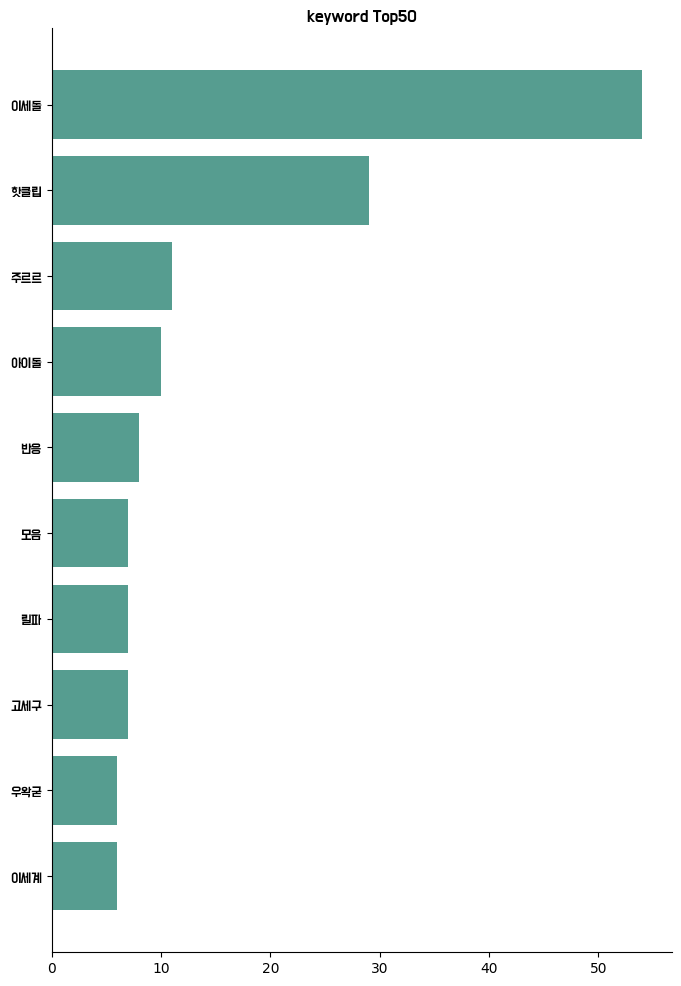

In [ ]:
# #
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/BMDOHYEON_ttf.ttf"
fontprop = fm.FontProperties(fname=font_path)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

words = sorted(tokenizer.word_counts.items(), key=lambda x: x[1])
x = [i[0] for i in words[-10:]]
y = [i[1] for i in words[-10:]]

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(x, y, color='#569d90')
plt.yticks(fontproperties=fontprop, fontsize=8)  # 폰트 설정을 추가
plt.title("keyword Top10", fontproperties=fontprop)  # 폰트 설정을 추가
simpleaxis(ax)



### 마인크래프트
* 수익(benefit)으로 보았을때나 반응면으로 보았을때나 건축 콘테스트, 왁파트, 눕프로 해커 같은 주제들이 최상위 keyword에 올라가있다.
* 마인크래프트에 '고멤'이라는 키워드가 들어간 경우, 마인크래프트의 평균 이상의 댓글이 달린다. 👉 조회수나 수익면에서 부족하지만 '댓글' 이라는 시청자 반응면에서 꽤 높다.

### ISEGYE IDOL : YOUTUBE
* (benefit) 핫클립 위주의 영상이 많고, '반응 모음' keyword 들의 영상이 상위권 안에있다. '같이 보기' 같은 컨텐츠

* (조회수,reaction) 모든 이세돌 멤버분들이 keyword 에 있지만 특히, 눈에띄게 보이는 keyword 는  '주르르' '고세구' 이다.



### 풀영상
* (benefit, 조회수 , reaction) 풀영상의 경우  vr챗, 합방, 고멤, 상황극, 그리고 매년마다 유행타는 게임 (어몽어스 같은)류 들이 상위권에 있었다.

> 아쉽게도 다른 재생목록들을 보았을 때, 키워드들이 나오긴 하지만, 많은 양의 키워드를 볼 수는 없었다. title 보다 해당 영상의 댓글을 가져와야 더 정확한 분석이 가능할것 같다.



In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df = df[df['seconds']<=15000]

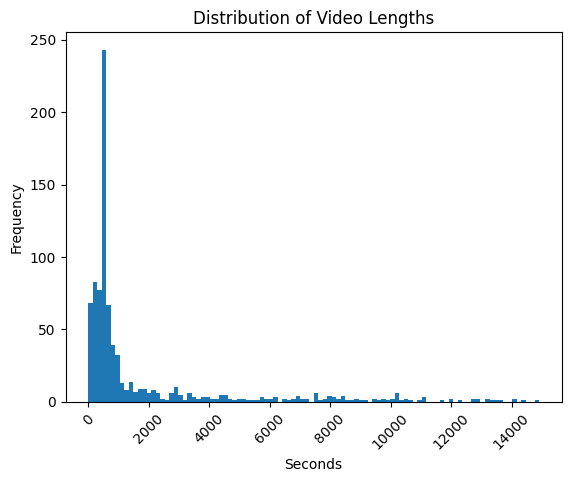

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df[df['year'].isin([2021,2022,2023])]['seconds'], bins=100)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Video Lengths')
plt.xticks(range(0, 15000, 2000),rotation=45)
plt.show()

In [ ]:
mask = ['view_count','like_count','comment_count','seconds','ad_count','ad_benefit','cost','benefit']
df_col= df[mask]

Correlation between seconds and benefit: 0.12248232491930607


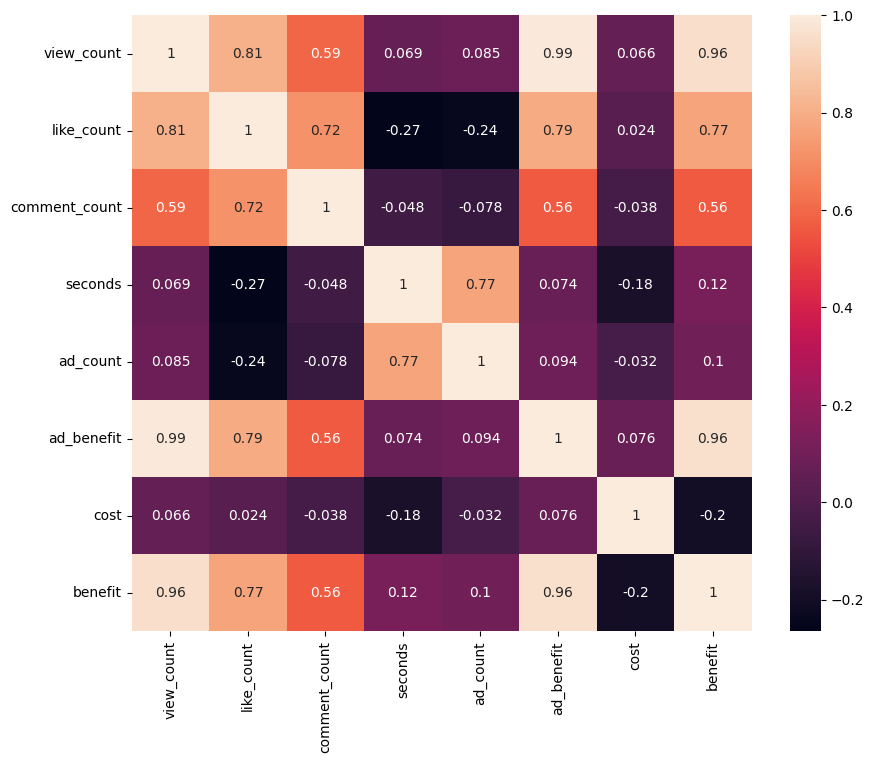

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_col.corr(), annot=True)

correlation = df['seconds'].corr(df['benefit'])
print("Correlation between seconds and benefit:", correlation)


In [ ]:

from pandas.plotting import scatter_matrix

scatter_matrix(df_col, figsize=(8, 8), diagonal='hist', alpha=0.8)
plt.show()


In [ ]:
import scipy.stats as stats
rho, p_val = stats.pearsonr(df_col['seconds'], df_col['benefit'])
print(f"결과: {rho},p-value {p_val}")

결과: 0.12248232491930611,p-value 0.00035889620731041795


### 조회수, 좋아요, 댓글수 상관관계
* 역시 생각했던 것 처럼. '조회수' ,'좋아요', '댓글수' 순으로 수익과 상관계수가 높았다.

###  영상의 길이와 수익의 상관관계 결과
* 먼저 영상의길이의 경우 보통 2000초 아래의
* seconds 와 benfit 의경우 상관계수 값이 0.1 로 그렇게 큰 상관관계가 있지는 않았다. p-value 0.0003

# 재생목록별로 좋아요, 댓글수, 수익에 차이가 있을 까?


## 우왁굳게임방송 (본채널)
### 좋아요수
> 노가리,마크,합방,시리즈,기타컨텐츠(먹방) 평균 좋아요수의 큰 차이가 없었다.

* 노가리 - 똥겜, 핫클립 과 유의미한 차이가 있음
* 똥겜 - 모든 컨텐츠와 유의미한 차이가 있다. 똥겜의 경우 평균 좋아요가 매우 낮음.

### 수익
* "노가리", "마크", "합방,시리즈,기타"의 경우 순서대로 top3 에 해당한다. 위 3개의 컨텐츠의 경우 통계적으로 유의미한 차이가 없었다.
* "똥겜"의 경우, "핫클립"을 제외하고 나머지 컨텐츠와 유의미한 차이가 있다. 역시 매우 낮다.

### 유저의 반응 댓글수
* "핫클립"과 "똥겜" (평균 댓글 수 낮음)
* "노가리" 컨텐츠와 "합방,시리즈,기타"  (평균 댓글 수 높음)
* 두 case 를 제외하고 모두 유의미한 차이가 있었다.

>  "마크" 컨텐츠 의 경우, 좋아요,수익 면에서 상위권에 있었지만 생각보다 "댓글 수"가 낮았다.
> "노가리" 컨텐츠의 경우, 모든 지표면에서 상위권을 달성하고있다. 가장 삼각형 컨텐츠라고 할 수 있다!

조회수, 좋아요가 높다고 꼭 댓글수가 높다라고 보장할 수는 없는것 같다.

In [ ]:
from scipy.stats import *

df = pd.read_csv('/content/dataset (1).csv')

df = df[~df['playlist_title'].str.contains('MUSIC')]
df.loc[df['playlist_title'].str.contains('ISEGYE | 이세여고|OFFICIAL'), 'playlist_title'] = 'ISEGYE IDOL : 예능'
df.loc[df['playlist_title'].str.contains('WAKTAVERSE'), 'playlist_title'] = 'WAKTAVERSE : 예능'

wakta = df[df['channel'] == 'waktaverse'][['playlist_title','seconds','view_count','like_count','comment_count','benefit']]
wakgood = df[df['channel'] =='우왁굳의게임방송' ][['playlist_title','seconds','view_count','like_count','comment_count','benefit']]

In [9]:
wakgood.loc[wakgood['playlist_title'] == '먹방/캠방', 'playlist_title'] = '합방,시리즈,기타 컨텐츠'

In [10]:
wakgood = wakgood[wakgood['playlist_title'].str.contains('마크|똥겜|컨텐츠|노가리|핫클립')]

In [106]:
group1 = wakgood[wakgood['playlist_title'] == '똥겜']['like_count']
group2 = wakgood[wakgood['playlist_title'] == '합방,시리즈,기타 컨텐츠']['like_count']
group3 = wakgood[wakgood['playlist_title'] == '핫클립,하이라이트']['like_count']
group4 = wakgood[wakgood['playlist_title'] == '노가리']['like_count']
group5 = wakgood[wakgood['playlist_title'] == '마크']['like_count']


In [23]:
group1 = np.log(group1)

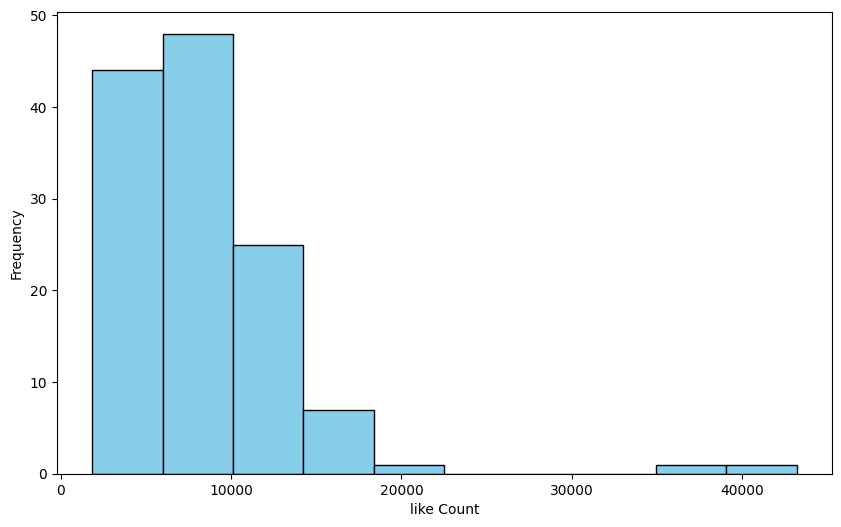

In [71]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(group1, bins=10, color='skyblue', edgecolor='black')

# 제목과 레이블 설정
plt.xlabel('like Count')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()


정규성 만족

In [73]:
# skewness(=왜도)는 2, kurtosis(=첨도)는 7보다 작으면 정규분포에서 크게 벗어나지 않고 정규성을 보인다"
# 어느정도
def nor (df):
  # 정규성 검정 실행
  statistic, p_value = normaltest(df)

  # 왜도(skewness)와 첨도(kurtosis) 출력
  skewness = df.skew()
  kurtosis = df.kurtosis()

  # 검정 결과 출력
  print(f" 결과")
  print("Skewness (왜도):", skewness)
  print("fKurtosis (첨도):", kurtosis)


nor(group1)
nor(group2)
nor(group3)
nor(group4)
nor(group5)


 결과
Skewness (왜도): 0.2760095239206248
fKurtosis (첨도): 1.4639999483109936
 결과
Skewness (왜도): 1.4964098982394665
fKurtosis (첨도): 4.135762731430333
 결과
Skewness (왜도): 0.7718367627990781
fKurtosis (첨도): 0.6648075429951521
 결과
Skewness (왜도): 0.6447344839761188
fKurtosis (첨도): -0.17409690993736593
 결과
Skewness (왜도): 1.2990812790008162
fKurtosis (첨도): 3.8858276526700766


In [74]:
levene_result = levene(group1, group2, group3,group4,group5)
levene_result.pvalue

3.057346851006075e-29

In [75]:
# 일원분산분석 실행
anova_result = f_oneway(group1, group2, group3,group4,group5)

# ANOVA 결과 출력
print("ANOVA 검정 통계량:", anova_result.statistic)
print("P-value:", round(anova_result.pvalue,3))


ANOVA 검정 통계량: 184.197149378667
P-value: 0.0


In [ ]:
# 사후 검정 실행
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(wakgood['like_count'], wakgood['playlist_title'],alpha=0.05)

# 사후 검정 결과 출력
print("사후 검정 결과:")
print(posthoc)


posthoc.plot_simultaneous(xlabel='mean', ylabel='group')
plt.show()



등분산 만족 하지 않을경우


In [115]:
# 등분산성 귀무가설 기각시 (등분산성 만족하지 않음)
# 웰치스 검정 이용
import pingouin as pg

pg.welch_anova(dv = 'comment_count', between = 'playlist_title', data = wakgood)
anova_result = pg.pairwise_gameshowell(dv = 'comment_count', between = 'playlist_title', data = wakgood)

# pval 열을 반올림하여 업데이트
anova_result['pval'] = anova_result['pval'].round(3)

anova_result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,노가리,똥겜,1273.228571,790.700787,482.527784,109.065767,4.424191,92.369256,0.000,0.768209
1,노가리,마크,1273.228571,940.041176,333.187395,106.123129,3.139630,83.674584,0.019,0.574061
2,노가리,"합방,시리즈,기타 컨텐츠",1273.228571,1431.677852,-158.449281,126.690259,-1.250682,148.046769,0.722,-0.174245
3,노가리,"핫클립,하이라이트",1273.228571,728.351351,544.877220,109.848200,4.960274,90.690173,0.000,0.770441
4,똥겜,마크,790.700787,940.041176,-149.340389,52.422997,-2.848757,257.735904,0.038,-0.337591
5,똥겜,"합방,시리즈,기타 컨텐츠",790.700787,1431.677852,-640.977065,86.812866,-7.383434,223.981375,0.000,-0.847251
6,똥겜,"핫클립,하이라이트",790.700787,728.351351,62.349436,59.604355,1.046055,106.071198,0.833,0.145347
7,마크,"합방,시리즈,기타 컨텐츠",940.041176,1431.677852,-491.636676,83.085803,-5.917216,200.638363,0.000,-0.691906
8,마크,"핫클립,하이라이트",940.041176,728.351351,211.689825,54.031992,3.917861,82.812608,0.002,0.526793
9,"합방,시리즈,기타 컨텐츠","핫클립,하이라이트",1431.677852,728.351351,703.326501,87.793845,8.011114,181.567137,0.000,0.828908


## 왁타버스

### Waktaverse 채널 핵심
>  "이세계 아이돌" 예능 영상의 평균 좋아요,댓글,수익,조회수 모두 가장 높았으며, 유의미한 차이가 있다고 할 수 있다.

> "왁타버스" 고멤예능의 경우 "이세계 아이돌" 예능 영상과 비교했을 때, 큰차이가 나지 않는 부분은 바로 "댓글 수" 였다. 어쩌면 시청자의 반응이라고 할 수 있는 댓글 수에서 큰 차이가 나지 않는다.

> "우왁굳 풀영상" 의 경우 풀영상이라는 특성상, 모든 지표면에서 높기 쉽지않다.

"이세계 아이돌" 과 "왁타버스" 예능 영상의 평균 "댓글 수"를 제외하고 모두 유의미한 차이가 있었다!

In [4]:
from scipy.stats import *

In [ ]:
group_0 = df[df['seconds'] <= 60] # shorts

group_1 = df[(60 < df['seconds']) & (df['seconds'] < 600)]
group_2 = df[df['seconds'] >= 600]

group_3 = df[(600 < df['seconds']) & (df['seconds'] < 1200)]
group_4 = df[df['seconds'] >= 1200]

group_5 = df[df['seconds'] >= 3600]


group_1_data = group_1['benefit']
group_2_data = group_2['benefit']
group_3_data = group_3['benefit']
group_4_data = group_4['benefit']

kruskal_statistic, kruskal_pvalue = kruskal(group_1_data, group_3_data, group_4_data)

print(kruskal_statistic)
print(round(kruskal_pvalue,3))

101.60129985128461
0.0


In [ ]:
# waktaverse
wakta = wakta[wakta['playlist_title'].str.contains('예능|우왁굳')]

wakta1 = wakta[wakta['playlist_title']== 'WAKTAVERSE : 예능']['like_count']
wakta2 = wakta[wakta['playlist_title']== '우왁굳 풀영상']['like_count']
wakta3 = wakta[wakta['playlist_title']== 'ISEGYE IDOL : 예능']['like_count']

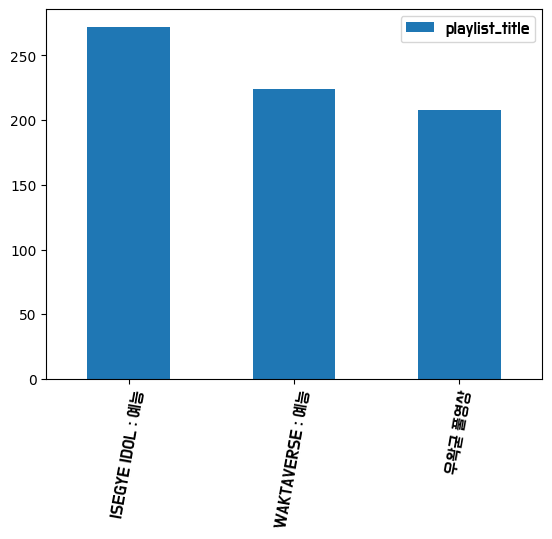

In [44]:
# 왁타버스 재생목록별 영상 수
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as f

font_path = "/content/BMDOHYEON_ttf.ttf"
font = fm.FontProperties(fname=font_path)


wakta['playlist_title'].value_counts().plot(kind='bar')

plt.xticks(rotation=80, fontproperties=font)
plt.legend(prop=font)

plt.show()

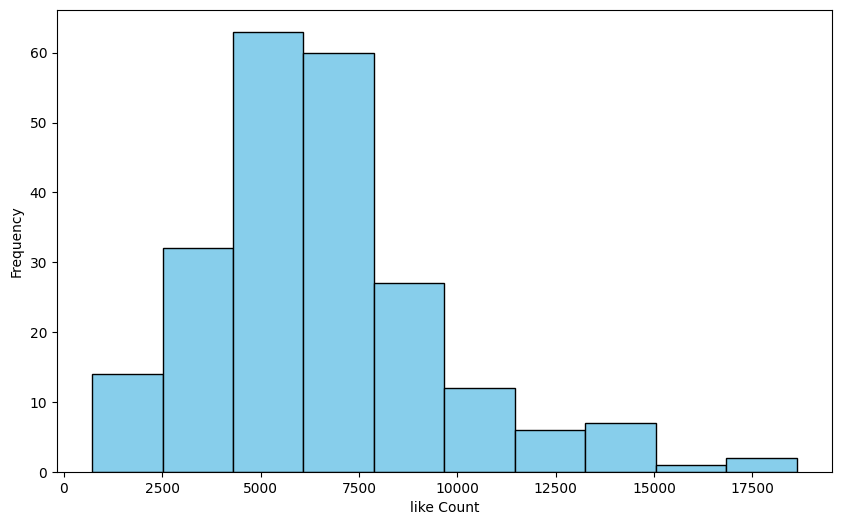

In [77]:
# 데이터 분포

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(wakta1, bins=10, color='skyblue', edgecolor='black')

# 제목과 레이블 설정
plt.xlabel('like Count')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()


In [11]:
wakgood['playlist_title'].unique()

array(['똥겜', '합방,시리즈,기타 컨텐츠', '핫클립,하이라이트', '마크', '노가리'], dtype=object)

In [78]:
# 정규성 확인

# skewness(=왜도)는 2, kurtosis(=첨도)는 7보다 작으면 정규분포에서 크게 벗어나지 않고 정규성을 보인다"
# 어느정도
def nor (df):
  # 정규성 검정 실행
  statistic, p_value = normaltest(df)

  # 왜도(skewness)와 첨도(kurtosis) 출력
  skewness = df.skew()
  kurtosis = df.kurtosis()

  # 검정 결과 출력
  print(f" 결과")
  print("Skewness (왜도):", skewness)
  print("fKurtosis (첨도):", kurtosis)


nor(wakta1)
nor(wakta2)
nor(wakta3)


 결과
Skewness (왜도): 0.9568052584429088
fKurtosis (첨도): 1.4510527749259738
 결과
Skewness (왜도): 4.593269360177928
fKurtosis (첨도): 35.745554367646406
 결과
Skewness (왜도): 1.8956483693983797
fKurtosis (첨도): 10.398702458268641


In [80]:
# 등분산성 확인
levene_result = levene(wakta1, wakta2, wakta3)
levene_result.pvalue


8.129669055370751e-16

In [86]:
# 등분산성 귀무가설 채택시
# 일원분산분석 실행
anova_result = f_oneway(wakta1,wakta2, wakta3)

# ANOVA 결과 출력
print("ANOVA 검정 통계량:", anova_result.statistic)
print("P-value:", round(anova_result.pvalue,3))



ANOVA 검정 통계량: 258.77154719673615
P-value: 0.0


In [ ]:
# ANOVA 이후 유의미한 차이가 있다면.
# 사후 검정 실행
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(wakgood['like_count'], wakgood['playlist_title'],alpha=0.05)

# 사후 검정 결과 출력
print("사후 검정 결과:")
print(posthoc)


posthoc.plot_simultaneous(xlabel='mean', ylabel='group')
plt.show()

In [ ]:
!pip install pingouin

In [105]:
# 등분산성 귀무가설 기각시 (등분산성 만족하지 않음)
# 웰치스 검정 이용
import pingouin as pg

pg.welch_anova(dv = 'view_count', between = 'playlist_title', data = wakta)
anova_result= pg.pairwise_gameshowell(dv = 'view_count', between = 'playlist_title', data = wakta)

# pval 열을 반올림하여 업데이트
anova_result['pval'] = anova_result['pval'].round(3)

anova_result

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,ISEGYE IDOL : 예능,WAKTAVERSE : 예능,385478.113971,308521.566964,76956.547006,21584.727484,3.565324,477.240130,0.001,0.309864
1,ISEGYE IDOL : 예능,우왁굳 풀영상,385478.113971,193489.865385,191988.248586,22174.562267,8.658040,474.717591,0.000,0.760871
2,WAKTAVERSE : 예능,우왁굳 풀영상,308521.566964,193489.865385,115031.701580,18961.684158,6.066534,424.944561,0.000,0.583889
